In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import glob
import SimpleITK as sitk
from matplotlib import pyplot as plt

/Users/liliangbin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [24]:
imgs = glob.glob("train/1001/venous phase"+ "//*." + "dcm")
print(len(imgs))

31


In [3]:
imgdatas = np.ndarray((len(imgs), 512, 512, 1), dtype=np.uint8)
imglabels = np.ndarray((len(imgs), 512, 512, 1), dtype=np.uint8)

1
(31, 512, 512)


TypeError: Invalid dimensions for image data

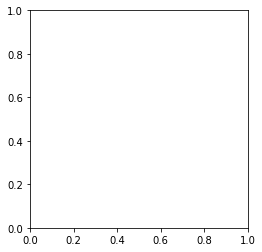

In [22]:
reader = sitk.ImageSeriesReader()
seriesIDs = reader.GetGDCMSeriesIDs("train")
print(len(seriesIDs))
dicom_names = reader.GetGDCMSeriesFileNames("train", seriesIDs[0])
#print(dicom_names)
reader.SetFileNames(dicom_names)
image = reader.Execute()
image_array = sitk.GetArrayFromImage(image) # z, y, x
print(image_array.shape)
# 这是一个类型的数据，我们把这一系列的图片打出来。
# image = sitk.ReadImage("train/20021.dcm")
# image_array = sitk.GetArrayFromImage(image) # z, y, x
# print(image_array.shape)
# images = np.squeeze(image_array) 
# plt.imshow(images)
# plt.show()
# img = load_img("li.tif" , grayscale=True)
# plt.imshow(img)
# plt.show()
img = img_to_array(img)

print(img.shape)

In [5]:
      for imgname in imgs:
            print(imgname)
            midname = imgname[imgname.rindex("/") + 1:]
            img = load_img("train" + "/1001" + "/venous phase/" + midname, grayscale=True)
            # print(img)
            label = load_img("train" + "/1001"+ "/venous phase/" + midname, grayscale=True)
            img = img_to_array(img)
            label = img_to_array(label)
            # img = cv2.imread(self.data_path + "/" + midname,cv2.IMREAD_GRAYSCALE)
            # label = cv2.imread(self.label_path + "/" + midname,cv2.IMREAD_GRAYSCALE)
            # img = np.array([img])
            # label = np.array([label])
            imgdatas[i] = img
            imglabels[i] = label
            if i % 100 == 0:
                print('Done: {0}/{1} images'.format(i, len(imgs)))
            i += 1
        print('loading done')
        np.save("npy_train" + '/imgs_train_1001.npy', imgdatas)
        print(imgdatas)
        np.save("npy_train"+ '/imgs_mask_train_1001.npy', imglabels)
        print('Saving to .npy files done.')
  

train/20021.dcm


/Users/liliangbin/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:489: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


OSError: cannot identify image file 'train/20021.dcm'